# Library Installation

In [3]:
# !pip install -q pyod==2.0.5
# !pip install numpy==1.24.4
# !pip install --no-cache-dir scikit-learn==1.0.2
# !pip install --no-cache-dir cloudpickle==3.1.1
# !pip install pandas scikit-learn tensorflow --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org
!pip install -v --no-cache-dir torch==2.4.1 --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org
# !pip install shap
# !pip install lime
# !pip uninstall -v scikit-learn


Using pip 25.2 from C:\Users\281379\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pip (python 3.10)
  Obtaining dependency information for torch==2.4.1 from https://files.pythonhosted.org/packages/5d/4c/b2a59ff0e265f5ee154f0d81e948b1518b94f545357731e1a3245ee5d45b/torch-2.4.1-cp310-cp310-win_amd64.whl.metadata
   ---------------------------------------- 0.0/199.4 MB ? eta -:--:--
   ---------------------------------------- 0.5/199.4 MB 5.6 MB/s eta 0:00:36
   ---------------------------------------- 1.0/199.4 MB 3.0 MB/s eta 0:01:08
   ---------------------------------------- 1.3/199.4 MB 2.9 MB/s eta 0:01:09
   ---------------------------------------- 1.6/199.4 MB 1.8 MB/s eta 0:01:49
    --------------------------------------- 2.6/199.4 MB 2.6 MB/s eta 0:01:17
    --------------------------------------- 2.6/199.4 MB 2.6 MB/s eta 0:01:17
    --------------------------------------- 2.9/199.4 MB 2.0 MB/s eta 0:


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\281379\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
# !pip show torch
import sys

print(sys.path)

['C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\python310.zip', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\DLLs', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\lib', 'C:\\Users\\281379\\AppData\\Local\\Microsoft\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0', '', 'C:\\Users\\281379\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages', 'C:\\Users\\281379\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\win32', 'C:\\Users\\281379\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\win32\\lib', 'C:\\Users\\281379\\AppData\\Local\\Packages\\PythonSoftwareFoundatio

In [1]:
# !pip show pyod
# !pip show torch
# !pip show lime

import sys
import numpy as np
import pyod, torch, lime
import joblib
import cloudpickle

print(f"✅ Python version: {sys.version}")
print(f"✅ NumPy version: {np.__version__}")
print(f"✅ PyOD version: {pyod.__version__}")
print(f"✅ torch version: {torch.__version__}")
print(f"✅ CloudPickle version: {cloudpickle.__version__}")
try:
    import sklearn
    print(f"✅ scikit-learn version: {sklearn.__version__}")
except ImportError:
    print("❌ scikit-learn not found!")

# print(f"📁 Attempting to load: {model_file}")
# print(f"✅ Lime version: {lime.__version__}")


✅ Python version: 3.13.9 (tags/v3.13.9:8183fa5, Oct 14 2025, 14:09:13) [MSC v.1944 64 bit (AMD64)]
✅ NumPy version: 2.3.2
✅ PyOD version: 2.0.5
✅ torch version: 2.9.0+cpu
✅ CloudPickle version: 3.1.1
✅ scikit-learn version: 1.7.1


# Library Imports

In [22]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import torch
import types
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from pyod.models.dif import DIF
from pyod.models.anogan import AnoGAN
from pyod.models.alad import ALAD
from pyod.models.ecod import ECOD
import shap

# Load Data

In [18]:
# Load your dataset
df = pd.read_csv("Datasets/demo_test_weekly_data_tip_3010.csv")
df.describe()

provider_id  provider_office_zip_cd  provider_office_zip_cd_3_digit  \
count   10000.0000            10000.000000                    10000.000000   
mean    49682.4403            49996.159400                      506.444300   
std     28900.4603            28599.875047                      288.339623   
min         1.0000              515.000000                        5.000000   
25%     24206.0000            25471.250000                      258.000000   
50%     49891.0000            49424.000000                      509.000000   
75%     74682.7500            74935.000000                      761.000000   
max     99998.0000            99917.000000                      999.000000   

       medicare_provider_id_provider  national_provider_id_provider  \
count                   1.000000e+04                   1.000000e+04   
mean                    5.519236e+08                   1.501869e+09   
std                     2.626509e+08                   2.910195e+08   
min                     1.000498e+08                   1.003178e+09   
25%                     3.231558e+08                   1.245067e+09   
50%                     5.549938e+08                   1.508252e+09   
75%                     7.838119e+08                   1.750846e+09   
max                     9.999480e+08                   1.992987e+09   

           payer_cd  provider_specialty_cd  provider_state_license_number  \
count  10000.000000           10000.000000                   10000.000000   
mean     503.668800             132.267300                  549072.392200   
std      289.026227              70.966824                  258169.055238   
min        1.000000               1.000000                  100142.000000   
25%      255.000000              59.000000                  327316.500000   
50%      508.000000             150.000000                  553330.500000   
75%      754.000000             193.000000                  770910.000000   
max      999.000000             244.000000                  999650.000000   

       provider_tax_id  provider_composite_id  medicaid_facility_number  \
count     1.000000e+04            10000.00000              10000.000000   
mean      5.547644e+08            54694.85520              55135.134300   
std       2.586359e+08            25832.15744              25995.419463   
min       1.001144e+08            10000.00000              10024.000000   
25%       3.328279e+08            32535.00000              32859.000000   
50%       5.587646e+08            54368.00000              54866.000000   
75%       7.793729e+08            76725.25000              77884.000000   
max       9.999071e+08            99996.00000              99990.000000   

       medicare_provider_id_provider_composite  \
count                             1.000000e+04   
mean                              5.452826e+08   
std                               2.589114e+08   
min                               1.001651e+08   
25%                               3.174352e+08   
50%                               5.449645e+08   
75%                               7.684178e+08   
max                               9.999638e+08   

       national_provider_id_provider_composite  provider_composite_address_id  \
count                             1.000000e+04                   10000.000000   
mean                              5.495788e+08                   54321.062500   
std                               2.598726e+08                   26019.180623   
min                               1.001584e+08                   10001.000000   
25%                               3.216616e+08                   31585.000000   
50%                               5.506076e+08                   53769.000000   
75%                               7.752914e+08                   77004.000000   
max                               9.994621e+08                   99984.000000   

           latitude     longitude      zip_cd  zip_cd_3_digit           hsr  
count  10000.000000  10000.000000  

# Helper functions

In [24]:

def check_indexes(target_indexes, indexes_to_find):
    idx_list = []
    for idx in indexes_to_find:
        if idx in target_indexes:
            print(f"-- Index {idx} found.")
            idx_list.append(idx)
    return idx_list
        # else:
            # print(f"Index {idx} not found.")


In [26]:

import matplotlib.pyplot as plt

# from .data import check_consistent_shape
# from .data import get_outliers_inliers
from sklearn.utils import check_X_y
from sklearn.utils import check_consistent_length
from sklearn.utils import column_or_1d

def check_consistent_shape(X_train, y_train, X_test, y_test, y_train_pred,
                           y_test_pred):
    """Internal shape to check input data shapes are consistent.

    Parameters
    ----------
    X_train : numpy array of shape (n_samples, n_features)
        The training samples.

    y_train : list or array of shape (n_samples,)
        The ground truth of training samples.

    X_test : numpy array of shape (n_samples, n_features)
        The test samples.

    y_test : list or array of shape (n_samples,)
        The ground truth of test samples.

    y_train_pred : numpy array of shape (n_samples, n_features)
        The predicted binary labels of the training samples.

    y_test_pred : numpy array of shape (n_samples, n_features)
        The predicted binary labels of the test samples.

    Returns
    -------
    X_train : numpy array of shape (n_samples, n_features)
        The training samples.

    y_train : list or array of shape (n_samples,)
        The ground truth of training samples.

    X_test : numpy array of shape (n_samples, n_features)
        The test samples.

    y_test : list or array of shape (n_samples,)
        The ground truth of test samples.

    y_train_pred : numpy array of shape (n_samples, n_features)
        The predicted binary labels of the training samples.

    y_test_pred : numpy array of shape (n_samples, n_features)
        The predicted binary labels of the test samples.
    """

    # check input data shapes are consistent
    X_train, y_train = check_X_y(X_train, y_train)
    X_test, y_test = check_X_y(X_test, y_test)

    y_test_pred = column_or_1d(y_test_pred)
    y_train_pred = column_or_1d(y_train_pred)

    check_consistent_length(y_train, y_train_pred)
    check_consistent_length(y_test, y_test_pred)

    if X_train.shape[1] != X_test.shape[1]:
        raise ValueError("X_train {0} and X_test {1} have different number "
                         "of features.".format(X_train.shape, X_test.shape))

    return X_train, y_train, X_test, y_test, y_train_pred, y_test_pred


def get_outliers_inliers(X, y):
    """Internal method to separate inliers from outliers.

    Parameters
    ----------
    X : numpy array of shape (n_samples, n_features)
        The input samples

    y : list or array of shape (n_samples,)
        The ground truth of input samples.

    Returns
    -------
    X_outliers : numpy array of shape (n_samples, n_features)
        Outliers.

    X_inliers : numpy array of shape (n_samples, n_features)
        Inliers.

    """
    X_outliers = X[np.where(y == 1)]
    X_inliers = X[np.where(y == 0)]
    return X_outliers, X_inliers


def visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
              y_test_pred, show_figure=True,
              save_figure=False):  # pragma: no cover
    """Utility function for visualizing the results in examples.
    Internal use only.

    Parameters
    ----------
    clf_name : str
        The name of the detector.

    X_train : numpy array of shape (n_samples, n_features)
        The training samples.

    y_train : list or array of shape (n_samples,)
        The ground truth of training samples.

    X_test : numpy array of shape (n_samples, n_features)
        The test samples.

    y_test : list or array of shape (n_samples,)
        The ground truth of test samples.

    y_train_pred : numpy array of shape (n_samples, n_features)
        The predicted binary labels of the training samples.

    y_test_pred : numpy array of shape (n_samples, n_features)
        The predicted binary labels of the test samples.

    show_figure : bool, optional (default=True)
        If set to True, show the figure.

    save_figure : bool, optional (default=False)
        If set to True, save the figure to the local.

    """

    def _add_sub_plot(X_inliers, X_outliers, sub_plot_title,
                      inlier_color='blue', outlier_color='orange'):
        """Internal method to add subplot of inliers and outliers.

        Parameters
        ----------
        X_inliers : numpy array of shape (n_samples, n_features)
            Outliers.

        X_outliers : numpy array of shape (n_samples, n_features)
            Inliers.

        sub_plot_title : str
            Subplot title.

        inlier_color : str, optional (default='blue')
            The color of inliers.

        outlier_color : str, optional (default='orange')
            The color of outliers.

        """
        plt.axis("equal")
        plt.scatter(X_inliers[:, 0], X_inliers[:, 1], label='inliers',
                    color=inlier_color, s=40)
        plt.scatter(X_outliers[:, 0], X_outliers[:, 1],
                    label='outliers', color=outlier_color, s=50, marker='^')
        plt.title(sub_plot_title, fontsize=15)
        plt.xticks([])
        plt.yticks([])
        plt.legend(loc=3, prop={'size': 10})

    # check input data shapes are consistent
    X_train, y_train, X_test, y_test, y_train_pred, y_test_pred = \
        check_consistent_shape(X_train, y_train, X_test, y_test, y_train_pred,
                               y_test_pred)

    if X_train.shape[1] != 2:
        raise ValueError("Input data has to be 2-d for visualization. The "
                         "input data has {shape}.".format(shape=X_train.shape))

    X_train_outliers, X_train_inliers = get_outliers_inliers(X_train, y_train)
    X_train_outliers_pred, X_train_inliers_pred = get_outliers_inliers(
        X_train, y_train_pred)

    X_test_outliers, X_test_inliers = get_outliers_inliers(X_test, y_test)
    X_test_outliers_pred, X_test_inliers_pred = get_outliers_inliers(
        X_test, y_test_pred)

    # plot ground truth vs. predicted results
    fig = plt.figure(figsize=(12, 10))
    plt.suptitle("Demo of {clf_name} Detector".format(clf_name=clf_name),
                 fontsize=15)

    fig.add_subplot(221)
    _add_sub_plot(X_train_inliers, X_train_outliers, 'Train Set Ground Truth',
                  inlier_color='blue', outlier_color='orange')

    fig.add_subplot(222)
    _add_sub_plot(X_train_inliers_pred, X_train_outliers_pred,
                  'Train Set Prediction', inlier_color='blue',
                  outlier_color='orange')

    fig.add_subplot(223)
    _add_sub_plot(X_test_inliers, X_test_outliers, 'Test Set Ground Truth',
                  inlier_color='green', outlier_color='red')

    fig.add_subplot(224)
    _add_sub_plot(X_test_inliers_pred, X_test_outliers_pred,
                  'Test Set Prediction', inlier_color='green',
                  outlier_color='red')

    if save_figure:
        plt.savefig('{clf_name}.png'.format(clf_name=clf_name), dpi=300)

    if show_figure:
        plt.show()


def data_visualize(X_train, y_train, show_figure=True,
                   save_figure=False):  # pragma: no cover
    """Utility function for visualizing the synthetic samples generated by
    generate_data_cluster function.

    Parameters
    ----------
    X_train : numpy array of shape (n_samples, n_features)
        The training samples.

    y_train : list or array of shape (n_samples,)
        The ground truth of training samples.

    show_figure : bool, optional (default=True)
        If set to True, show the figure.

    save_figure : bool, optional (default=False)
        If set to True, save the figure to the local.

    """

    def _plot(X_inliers, X_outliers, inlier_color='blue',
              outlier_color='orange'):
        """Internal method to add subplot of inliers and outliers.

        Parameters
        ----------
        X_inliers : numpy array of shape (n_samples, n_features)
            Outliers.

        X_outliers : numpy array of shape (n_samples, n_features)
            Inliers.

        sub_plot_title : str
            Subplot title.

        inlier_color : str, optional (default='blue')
            The color of inliers.

        outlier_color : str, optional (default='orange')
            The color of outliers.

        """
        plt.axis("equal")
        plt.scatter(X_inliers[:, 0], X_inliers[:, 1], label='inliers',
                    color=inlier_color, s=40)
        plt.scatter(X_outliers[:, 0], X_outliers[:, 1],
                    label='outliers', color=outlier_color, s=50, marker='^')
        plt.xticks([])
        plt.yticks([])
        plt.legend(loc='best', prop={'size': 10})

    assert len(X_train) <= 5
    in_colors = ['blue', 'green', 'purple', 'brown', 'black']
    out_colors = ['red', 'orange', 'grey', 'violet', 'pink']
    plt.figure(figsize=(13, 10))
    plt.suptitle("Demo of Generating Data in Clusters", fontsize=15)
    for i, cluster in enumerate(X_train):
        X_train_outliers, X_train_inliers = get_outliers_inliers(cluster,
                                                                 y_train[i])
        _plot(X_train_inliers, X_train_outliers,
              inlier_color=in_colors[i],
              outlier_color=out_colors[i])

    if save_figure:
        plt.savefig()

    if show_figure:
        plt.show()

# Train Test Split

In [7]:
# Keep only numeric columns and drop missing values
df_numeric = df.select_dtypes(include='number').dropna()
print(df_numeric.shape)

# Split into training and test sets
X_train, X_test = train_test_split(df_numeric, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)

(10000, 19)
(7000, 19) (3000, 19)


# Anomaly Approaches

## ECOD Model

In [22]:
# --- ECOD Model ---
ecod = ECOD()
ecod.fit(X_train)
ecod_train_scores = ecod.decision_scores_
ecod_test_scores = ecod.decision_function(X_test)

# Print summaries
print("ECOD Training Scores Summary:")
print(pd.Series(ecod_train_scores).describe())

print("\nECOD Test Scores Summary:")
print(pd.Series(ecod_test_scores).describe())

# Train - Average anomaly score is 31
# Test  - Average anomaly score is 32

ECOD Training Scores Summary:
count    7000.000000
mean       31.983964
std         4.268723
min        20.628560
25%        29.024049
50%        31.676003
75%        34.657116
max        53.376981
dtype: float64

ECOD Test Scores Summary:
count    3000.000000
mean       32.002381
std         4.362486
min        20.613936
25%        28.927263
50%        31.712001
75%        34.699831
max        49.058317
dtype: float64


In [39]:
#  Define percentiles to evaluate
percentiles = [25, 50, 75, 90, 95, 99]

# Create a DataFrame with test data and scores
test_df = pd.DataFrame(X_test)  # assuming X_test is a DataFrame or can be converted
test_df['ECOD_Score'] = ecod_test_scores
test_df = test_df[['provider_id','national_provider_id_provider_composite', 'ECOD_Score']]

# Generate anomaly DataFrames for each percentile
anomaly_dfs = {}
for p in percentiles:
    threshold = np.percentile(ecod_test_scores, p)
    df_name = f'ecod_anomaly_df_{p}'
    anomaly_df = test_df[test_df['ECOD_Score'] > threshold].copy()
    anomaly_df['is_ecod_anomaly'] = 'y'
    anomaly_dfs[df_name] = anomaly_df

In [ ]:
print(anomaly_dfs.keys())

target_indexes = anomaly_dfs['ecod_anomaly_df_50'].reset_index()['index'].tolist()

# Checking the ML Pattern 3.1 and Pattern 3.2 from Run - demo_run_0822_sunith_mathew_20250822_161724
indexes_to_find = [486,9106,9715] + [297,468,477,540,642,743,779,897,930,944,986,1533,1547,1583,1936,1994,2136,2367,2396,2483,2487,2652,2748,3015,3035,3180,3224,3302,3356,3511,3542,3548,3613,3678,3749,3765,3803,3823,3886,3907,4030,4134,4143,4146,4181,4265,4384,4437,4594,4728,4997,5127,5258,5301,5330,5342,5406,5504,5898,5959,6334,6370,6478,6538,6579,6706,6919,6989,7157,7221,7256,7280,7285,7296,7354,7373,7446,7477,7532,7868,7898,7942,7958,8221,8253,8265,8289,8320,8420,8512,8615,8816,8849,8850,8971,8979,9090,9267,9282,9287,9302,9356,9380,9556,9596,9672,9936]
print("Checking matching anomalous rows from ML Pattern 3.1 and 3.2")
print(f"Total rows in ML Pattern 3.1 and 3.2: {len(indexes_to_find)}")
matching_indexes = check_indexes(target_indexes, indexes_to_find)
print(f"Total overlapping anomalies: {len(matching_indexes)}")



dict_keys(['ecod_anomaly_df_25', 'ecod_anomaly_df_50', 'ecod_anomaly_df_75', 'ecod_anomaly_df_90', 'ecod_anomaly_df_95', 'ecod_anomaly_df_99'])
Checking matching anomalous rows from ML Pattern 3.1 and 3.2
Total rows in ML Pattern 3.1 and 3.2: 110
-- Index 9106 found.
-- Index 540 found.
-- Index 743 found.
-- Index 779 found.
-- Index 1533 found.
-- Index 2487 found.
-- Index 2748 found.
-- Index 3542 found.
-- Index 4181 found.
-- Index 4265 found.
-- Index 6478 found.
-- Index 6989 found.
-- Index 7256 found.
-- Index 7477 found.
-- Index 7942 found.
-- Index 8849 found.
-- Index 8850 found.
-- Index 8979 found.
-- Index 9556 found.
Total overlapping anomalies: 19


In [40]:
# # visualize the results
# visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
#               y_test_pred, show_figure=True, save_figure=False)

X_train

provider_id  provider_office_zip_cd  provider_office_zip_cd_3_digit  \
9069        23351                   39920                             436   
2603         9570                   51772                             700   
7738        61182                   85162                             886   
1579        44558                   78320                             142   
5058         1618                   80362                             484   
...           ...                     ...                             ...   
5734        20031                   84754                             923   
5191        17891                   93152                             153   
5390        33272                   84349                             995   
860         26393                   14537                             504   
7270        90180                   33970                             149   

      medicare_provider_id_provider  national_provider_id_provider  payer_cd  \
9069                      991959537                     1720029150       628   
2603                      714036307                     1497250997       940   
7738                      193829029                     1033949920       905   
1579                      333710137                     1497585970       494   
5058                      768758406                     1720818735       189   
...                             ...                            ...       ...   
5734                      480045851                     1619707221       571   
5191                      492466404                     1992113336       930   
5390                      177500495                     1447782321        22   
860                       249229844                     1902643992        35   
7270                      558945051                     1730487984       138   

      provider_specialty_cd  provider_state_license_number  provider_tax_id  \
9069                    208                         972327        594203148   
2603                     34                         504190        913921864   
7738                    188                         299970        419899123   
1579                    155                         560133        456922393   
5058                    168                         999033        378253249   
...                     ...                            ...              ...   
5734                    200                         735535        116875365   
5191                    163                         103986        744725768   
5390                    125                         661068        562403165   
860                      29                         228273        346889140   
7270                      6                         597471        938222503   

      provider_composite_id  medicaid_facility_number  \
9069                  20707                     28504   
2603                  39180                     63205   
7738                  85728                     34468   
1579                  62321                     94498   
5058                  53873                     11691   
...                     ...                       ...   
5734                  70715                     33121   
5191                  78939                     69202   
5390                  57884                     79261   
860                   16258                     42833   
7270                  78613                     39985   

      medicare_provider_id_provider_composite  \
9069                                191165015   
2603                                921010810   
7738                                312186636   
1579                                775949210   
5058                                583377848   
...                                       ...   
5734                                770569272   
5191                                750641077   
5390                                771797062

## DIF Model

### Anomaly Generation

In [8]:

# --- DIF Model ---
# In DIF, each tree is replaced with a small neural network (autoencoder-like) model.
# The neural nets project data into different latent subspaces (randomly but nonlinearly). 
# Then isolation happens in those learned spaces, not just along raw features.

dif = DIF()
dif.fit(X_train)

dif_train_scores = dif.decision_scores_
dif_test_scores = dif.decision_function(X_test)

# Print summaries
print("DIF Train Scores Summary:")
print(pd.Series(dif_train_scores).describe())

print("DIF Test Scores Summary:")
print(pd.Series(dif_test_scores).describe())


<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:16: SyntaxWarning: invalid escape sequence '\D'
C:\Users\299957\AppData\Local\Temp\ipykernel_13620\3331413196.py:16: SyntaxWarning: invalid escape sequence '\D'
  print("\DIF Test Scores Summary:")


DIF Train Scores Summary:
count    7000.000000
mean        0.343960
std         0.046735
min         0.216579
25%         0.308847
50%         0.343942
75%         0.381948
max         0.442167
dtype: float64
\DIF Test Scores Summary:
count    3000.000000
mean        0.329923
std         0.009330
min         0.299535
25%         0.323475
50%         0.330149
75%         0.336232
max         0.368951
dtype: float64


In [77]:
# pd.DataFrame(X_test)

In [9]:

# Create a DataFrame with test data and scores
test_df = pd.DataFrame(X_test)  # assuming X_test is a DataFrame or can be converted
test_df['dif_Score'] = dif_test_scores

test_df = test_df[['provider_id','national_provider_id_provider_composite', 'dif_Score']]
print(test_df.shape)
test_df.head()


(3000, 3)


provider_id  national_provider_id_provider_composite  dif_Score
6252        82158                                372537220   0.347071
4684         7473                                591579466   0.319376
1731        80232                                929256456   0.322650
4742         5666                                657084011   0.326235
4521        49761                                268208160   0.331156

### Anomaly Percentile 

In [10]:
#  Define percentiles to evaluate
percentiles = [25, 50, 75, 90, 95, 99]

# Generate anomaly DataFrames for each percentile
dif_anomaly_dfs = {}
for p in percentiles:
    threshold = np.percentile(dif_test_scores, p)
    df_name = f'dif_anomaly_df_{p}'
    anomaly_df = test_df[test_df['dif_Score'] > threshold].copy()
    anomaly_df['is_dif_anomaly'] = 'y'
    dif_anomaly_dfs[df_name] = anomaly_df

print(dif_anomaly_dfs.keys())


dict_keys(['dif_anomaly_df_25', 'dif_anomaly_df_50', 'dif_anomaly_df_75', 'dif_anomaly_df_90', 'dif_anomaly_df_95', 'dif_anomaly_df_99'])


In [11]:
print(dif_anomaly_dfs['dif_anomaly_df_25']['dif_Score'].min(), dif_anomaly_dfs['dif_anomaly_df_25']['dif_Score'].max())

dif_anomaly_dfs['dif_anomaly_df_25']

# Location-related features : The high-anomaly samples are geographically shifted — they tend to come from areas with lower latitude and longitude values compared to low-anomaly samples.
# provider_specialty_cd :  

0.32348256133441017 0.3689511632630886


provider_id  national_provider_id_provider_composite  dif_Score  \
6252        82158                                372537220   0.347071   
4742         5666                                657084011   0.326235   
4521        49761                                268208160   0.331156   
576          2412                                474540707   0.339539   
5202         8429                                841488634   0.341154   
...           ...                                      ...        ...   
8014        61729                                490494582   0.333105   
1074        78317                                714130341   0.333496   
3063        28933                                184509019   0.342733   
6487        55627                                253796531   0.348202   
4705        63818                                905021354   0.339748   

     is_dif_anomaly  
6252              y  
4742              y  
4521              y  
576               y  
5202              y  
...             ...  
8014              y  
1074              y  
3063              y  
6487              y  
4705              y  

[2250 rows x 4 columns]

In [ ]:
# Taking too long to finish
 
# dif_explainer = shap.Explainer(dif.decision_function, X_test)
# dif_test_shap_values = dif_explainer(X_test)

# shap.summary_plot(dif_test_shap_values, X_test)

In [12]:
X_test.head(1)

provider_id  provider_office_zip_cd  provider_office_zip_cd_3_digit  \
6252        82158                   96796                             122   

      medicare_provider_id_provider  national_provider_id_provider  payer_cd  \
6252                      799933223                     1003646753       862   

      provider_specialty_cd  provider_state_license_number  provider_tax_id  \
6252                    149                         303185        112516411   

      provider_composite_id  medicaid_facility_number  \
6252                  99996                     14013   

      medicare_provider_id_provider_composite  \
6252                                270584592   

      national_provider_id_provider_composite  provider_composite_address_id  \
6252                                372537220                          45986   

       latitude   longitude  zip_cd  zip_cd_3_digit  hsr  
6252 -43.991836 -127.647363   88849              79   64

In [13]:
test_df

provider_id  national_provider_id_provider_composite  dif_Score
6252        82158                                372537220   0.347071
4684         7473                                591579466   0.319376
1731        80232                                929256456   0.322650
4742         5666                                657084011   0.326235
4521        49761                                268208160   0.331156
...           ...                                      ...        ...
8014        61729                                490494582   0.333105
1074        78317                                714130341   0.333496
3063        28933                                184509019   0.342733
6487        55627                                253796531   0.348202
4705        63818                                905021354   0.339748

[3000 rows x 3 columns]

In [ ]:

# feature distributions for high-score vs low-score samples

test_df_2 = pd.DataFrame(X_test)
test_df_2['score'] = dif.decision_function(test_df_2.values)

# High anomalies: Top 5% by anomaly score
high_anom = test_df_2[test_df_2['score'] > test_df_2['score'].quantile(0.95)]
# Low anomalies: Bottom 5% by anomaly score
low_anom = test_df_2[test_df_2['score'] < test_df_2['score'].quantile(0.05)]

diff = high_anom.mean() - low_anom.mean()
# feature-level directionality — variables with the biggest mean shift contribute most to anomalies.
print(diff.sort_values(ascending=False))

# diff.abs().sort_values(ascending=False).plot(kind='barh', figsize=(8,4))

# Positive diff → feature values are higher in anomalies vs normal cases.
# Negative diff → feature values are lower in anomalies vs normal cases.

# the anomalous records tend to have lower values (or different IDs) for those provider-related fields compared to normal records.
# The anomalies are clustered around a different set of providers / facilities / payers / zips than the normal ones.


score                                      3.765891e-02
hsr                                       -5.826667e+00
latitude                                  -3.140098e+01
longitude                                 -3.791089e+01
provider_specialty_cd                     -3.969333e+01
payer_cd                                  -9.174000e+01
zip_cd_3_digit                            -1.271067e+02
provider_office_zip_cd_3_digit            -1.417267e+02
zip_cd                                    -7.967493e+03
medicaid_facility_number                  -1.022403e+04
provider_office_zip_cd                    -1.139053e+04
provider_composite_address_id             -1.232092e+04
provider_composite_id                     -1.960905e+04
provider_id                               -2.181739e+04
provider_state_license_number             -1.203147e+05
medicare_provider_id_provider             -3.329108e+06
national_provider_id_provider_composite   -1.589046e+08
provider_tax_id                           -1.811

In [76]:
high_anom['payer_cd'].value_counts(normalize=True)

payer_cd
77     0.013333
684    0.013333
102    0.013333
673    0.013333
904    0.013333
         ...   
832    0.006667
551    0.006667
623    0.006667
263    0.006667
107    0.006667
Name: proportion, Length: 133, dtype: float64

In [ ]:
# how often each category (e.g., payer_cd or zip_cd_3_digit) appears in anomalies vs. normal:
anomaly_share = (
    high_anom['payer_cd'].value_counts(normalize=True) - low_anom['payer_cd'].value_counts(normalize=True)
).sort_values(ascending=False)
anomaly_share

# payer_cd - 914 is anomalous


payer_cd
914    0.006667
235    0.000000
142    0.000000
951    0.000000
255    0.000000
         ...   
977         NaN
983         NaN
992         NaN
996         NaN
998         NaN
Name: proportion, Length: 243, dtype: float64

<Axes: >

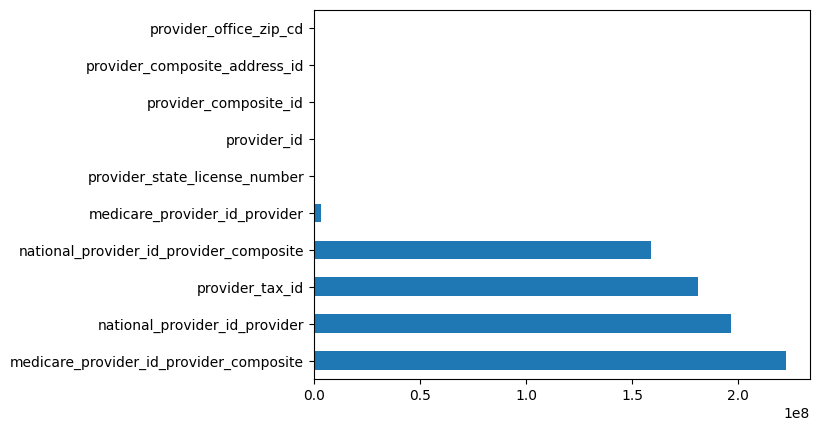

In [ ]:
# Features that differ most between anomalous and normal samples.
num_cols = X_train.select_dtypes(include='number').columns
diff[num_cols].sort_values()
diff.abs().sort_values(ascending=False).head(10).plot(kind='barh')

# Likely indicates which entities the anomalies are concentrated in, not numerical direction


In [82]:
diff.abs().sort_values(ascending=False).head(10)

medicare_provider_id_provider_composite    2.225878e+08
national_provider_id_provider              1.965369e+08
provider_tax_id                            1.811108e+08
national_provider_id_provider_composite    1.589046e+08
medicare_provider_id_provider              3.329108e+06
provider_state_license_number              1.203147e+05
provider_id                                2.181739e+04
provider_composite_id                      1.960905e+04
provider_composite_address_id              1.232092e+04
provider_office_zip_cd                     1.139053e+04
dtype: float64

### Feature Level Contribution Per Sample

In [85]:
def feature_contributions(model, X, epsilon=1e-4):
    """
    Approximate feature-level contributions per sample using finite differences.
    """
    X = X.copy()
    base_scores = model.decision_function(X)
    contributions = np.zeros_like(X, dtype=float)
    
    for j in range(X.shape[1]):
        X_perturbed = X.copy()
        X_perturbed[:, j] += epsilon
        
        perturbed_scores = model.decision_function(X_perturbed)
        contributions[:, j] = (perturbed_scores - base_scores) / epsilon  # numerical gradient
    
    return contributions

X_np = X_test.values
contrib_matrix = feature_contributions(dif, X_np)

# Mean absolute contribution per feature (global importance)
global_importance = np.mean(np.abs(contrib_matrix), axis=0)

importance_df = pd.DataFrame({
    "feature": X_test.columns,
    "importance": global_importance
}).sort_values("importance", ascending=False)

print(importance_df.head(10))


                           feature  importance
14                        latitude    0.005861
18                             hsr    0.003826
2   provider_office_zip_cd_3_digit    0.003401
15                       longitude    0.002386
17                  zip_cd_3_digit    0.001400
5                         payer_cd    0.001385
6            provider_specialty_cd    0.000916
16                          zip_cd    0.000002
10        medicaid_facility_number    0.000002
13   provider_composite_address_id    0.000002


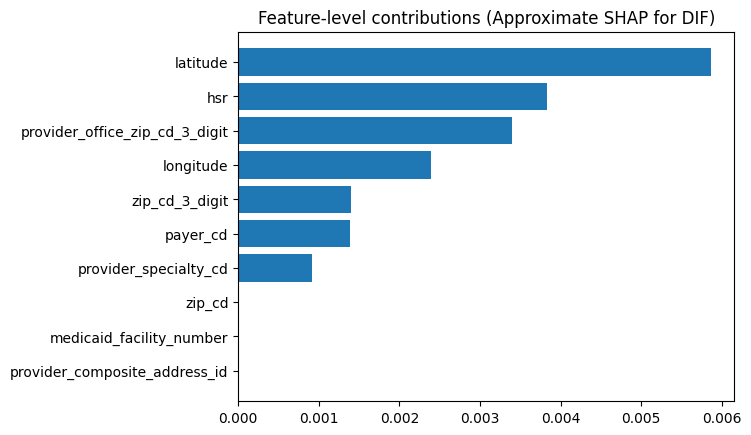

In [86]:
import matplotlib.pyplot as plt

top_features = importance_df.head(10)
plt.barh(top_features["feature"], top_features["importance"])
plt.gca().invert_yaxis()
plt.title("Feature-level contributions (Approximate SHAP for DIF)")
plt.show()


In [ ]:
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    mode='regression'
)

i = 1000
exp = explainer.explain_instance(
    data_row=X_test.iloc[i].values,
    predict_fn=dif.decision_function
)

exp.show_in_notebook(show_table=True)


### Provider Anomaly Comparison

In [34]:

from sklearn.preprocessing import OneHotEncoder

cols_set = ['provider_id','provider_first_nm_provider', 'provider_last_nm_provider','national_provider_id_provider_composite', 'urf_designation', 'provider_urf_designation']
subset_cols = ['urf_designation', 'provider_urf_designation']

provider_urf_data = df[subset_cols]

# Split into training and test sets
X_train_urf, X_test_urf = train_test_split(provider_urf_data, test_size=0.3, random_state=42)
print(X_train_urf.shape, X_test_urf.shape)



(7000, 2) (3000, 2)


In [35]:
X_test_urf.head(2)

urf_designation provider_urf_designation
6252        Frontier                 Frontier
4684           Rural                    Rural

In [36]:

# Perform One-Hot Encoding

# Perform One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore')  # dense output
X_trn_urf_encoded = encoder.fit_transform(X_train_urf)
X_tst_urf_encoded = encoder.transform(X_test_urf)
print(f"Encoder feature names: {encoder.feature_names_in_}")
trn_encoded_df = pd.DataFrame(X_trn_urf_encoded) # columns=encoder.get_feature_names_out(subset_cols)


Encoder feature names: ['urf_designation' 'provider_urf_designation']


In [37]:
trn_encoded_df

0
0     <Compressed Sparse Row sparse matrix of dtype ...
1     <Compressed Sparse Row sparse matrix of dtype ...
2     <Compressed Sparse Row sparse matrix of dtype ...
3     <Compressed Sparse Row sparse matrix of dtype ...
4     <Compressed Sparse Row sparse matrix of dtype ...
...                                                 ...
6995  <Compressed Sparse Row sparse matrix of dtype ...
6996  <Compressed Sparse Row sparse matrix of dtype ...
6997  <Compressed Sparse Row sparse matrix of dtype ...
6998  <Compressed Sparse Row sparse matrix of dtype ...
6999  <Compressed Sparse Row sparse matrix of dtype ...

[7000 rows x 1 columns]

In [38]:

dif_urf = DIF()
dif_urf.fit(X_trn_urf_encoded.toarray()) #trn_encoded_df

dif_train_scores_urf = dif_urf.decision_scores_
dif_test_scores_urf = dif_urf.decision_function(X_tst_urf_encoded.toarray())

# Print summaries
print("DIF Train Scores Summary:")
print(pd.Series(dif_train_scores_urf).describe())

print("DIF Test Scores Summary:")
print(pd.Series(dif_test_scores_urf).describe())

DIF Train Scores Summary:
count    7000.000000
mean        0.325369
std         0.007154
min         0.315585
25%         0.315585
50%         0.328436
75%         0.332179
max         0.376411
dtype: float64
DIF Test Scores Summary:
count    3000.000000
mean        0.323871
std         0.009118
min         0.311814
25%         0.311814
50%         0.327745
75%         0.333041
max         0.359283
dtype: float64


Threshold Comparison

In [37]:

# ---------------------------------------------
# Orchestrator: Load + Infer + Format Results
# ---------------------------------------------
def ml_dif_anomaly_lib_v2(
    df: pd.DataFrame,
) -> List[Dict[str, Any]]:
    """
    Load pretrained DIF model and encoder from the 'data/' directory
    (located one level above the current library folder), perform inference
    on df, and return anomalies in structured JSON format.
    """
    from sklearn.metrics import precision_score, recall_score, f1_score

    # 1 Resolve model and encoder paths
    try:
        base_dir = Path(__file__).resolve().parent.parent / "assets"
        # base_dir = Path("/app/data")
        # base_dir = Path(os.getcwd()) / "data"  # fallback for Jupyter or REPL
    except NameError:
        base_dir = Path(os.getcwd()) / "assets"  # fallback for Jupyter or REPL

    # # Resolve model and encoder paths
    # try:
    #     base_dir = Path(__file__).resolve().parent.parent / "data"
    # except NameError:
    #     base_dir = Path(os.getcwd()) / "data"  # fallback for Jupyter or REPL
    # model_file = base_dir / "dif_model.joblib"
    # encoder_file = base_dir / "encoder.joblib"

    print(f"base_dir set to: {base_dir}")

    model_files = ["dif_model_cloud.pkl"]
    encoder_files = ["encoder_cloud.pkl"]

    # Find the first existing model file
    model_file = next((base_dir / f for f in model_files if (base_dir / f).exists()), None)
    # Find the first existing encoder file
    encoder_file = next((base_dir / f for f in encoder_files if (base_dir / f).exists()), None)

    # Check if both files were found
    if model_file is None or encoder_file is None:
        raise FileNotFoundError(
            f"❌ Model or encoder not found in {base_dir}. "
            f"Tried: {model_files} and {encoder_files}"
        )
    
    # Patch missing module reference
    torch.utils = getattr(torch, "utils", types.SimpleNamespace())
    torch.utils.serialization = getattr(torch.utils, "serialization", types.SimpleNamespace())

    print(f" Loading model and encoder from: {base_dir}")
    with open(model_file, "rb") as f:
        model = cloudpickle.load(f)
    print(f"Loaded {model_file} file successfully")
    with open(encoder_file, "rb") as f:
        encoder = cloudpickle.load(f)
    print(f"Loaded {encoder_file} file successfully")

    # 2 Detect categorical columns automatically
    # subset_cols = df.select_dtypes(include="object").columns.tolist()
    subset_cols = ['urf_designation', 'provider_urf_designation']
    if not subset_cols:
        raise ValueError("❌ No categorical columns found for encoding in test data.")

    print(f"📊 Using columns for encoding: {subset_cols}")

    # 3 Perform inference
    X_test_encoded = encoder.transform(df[subset_cols])
    dif_scores = model.decision_function(X_test_encoded.toarray())

    # Ground truth (based on your domain logic)
    true_anomaly = (df["urf_designation"] != df["provider_urf_designation"]).astype(int)
    results = []
    threshold_percentile_list = [25,50,75,90,95,99]

    for percentile in threshold_percentile_list:
        threshold = np.percentile(dif_scores, percentile)
        
        df["dif_Score"] = dif_scores
        df["is_anomaly"] = (df["dif_Score"] > threshold).astype(int)
        
        # Compare with true anomalies
        precision = precision_score(true_anomaly, df["is_anomaly"], zero_division=0)
        recall = recall_score(true_anomaly, df["is_anomaly"], zero_division=0)
        f1 = f1_score(true_anomaly, df["is_anomaly"], zero_division=0)
        
        results.append({
            "threshold_percentile": percentile,
            "threshold_value": threshold,
            "precision": precision,
            "recall": recall,
            "f1": f1
        })

    # Convert results to DataFrame (for inspection)
    results_df = pd.DataFrame(results)
    print(f"Threshold Comparison results: {results_df}")
    best_row = results_df.loc[results_df["f1"].idxmax()]

    print(f"Best dynamic threshold: {best_row}")

    # 4 Apply threshold
    best_percentile = float(best_row["threshold_percentile"])
    threshold = float(best_row["threshold_value"])
    print(f"Best percentile based on the threshold: {results_df['threshold_percentile']}")

    df = df.copy()
    df["dif_Score"] = dif_scores
    df["is_anomaly"] = (df["dif_Score"] > threshold).astype(int)
    
    # print(f"✅ Inference complete. Threshold = {threshold_percentile}th percentile ({threshold:.4f})")
    print(f"✅ Inference complete. Threshold = {best_row}th percentile ({threshold:.4f})")
    
    print(df["is_anomaly"].value_counts())

    # 5 Filter anomalies
    anomalies = df[df["is_anomaly"] == 1].reset_index(drop=True)
    if anomalies.empty:
        print("⚠️ No anomalies detected by the model.")
        return []

    # 6 Columns to include in result (keep only existing ones)
    cols_to_include = [
        "provider_id",
        "provider_first_nm_provider",
        "provider_last_nm_provider",
        "national_provider_id_provider",
        "urf_designation",
        "provider_urf_designation",
        "dif_Score",
    ]
    existing_cols = [c for c in cols_to_include if c in anomalies.columns]

    # 7 Build structured result
    result = [
        {
            "issueCol": ["urf_designation", "provider_urf_designation"],
            "issueCode": ["pattern 3.3"],
            "issueDesc": [message_for_rule("rule_3_3")],
            "issueValues": [
                {col: anomalies[col].fillna("").tolist() for col in existing_cols}
            ],
            "rowNumbers": [anomalies.index.tolist()],
        }
    ]

    print(f" Generated structured output for {len(anomalies)} anomalies.")
    return result, results_df
 

In [39]:
# Run inference and evaluation
structured_output, results_df = ml_dif_anomaly_lib_v2(df)


base_dir set to: c:\Users\299957\Assessment\assets
 Loading model and encoder from: c:\Users\299957\Assessment\assets
Loaded c:\Users\299957\Assessment\assets\dif_model_cloud.pkl file successfully
Loaded c:\Users\299957\Assessment\assets\encoder_cloud.pkl file successfully
📊 Using columns for encoding: ['urf_designation', 'provider_urf_designation']
Threshold Comparison results:    threshold_percentile  threshold_value  precision  recall        f1
0                    25         0.311271   0.000445     1.0  0.000890
1                    50         0.326962   0.000882     1.0  0.001763
2                    75         0.327032   1.000000     1.0  1.000000
3                    90         0.327032   1.000000     1.0  1.000000
4                    95         0.327032   1.000000     1.0  1.000000
5                    99         0.327032   1.000000     1.0  1.000000
Best dynamic threshold: threshold_percentile    75.000000
threshold_value          0.327032
precision                1.000000
re

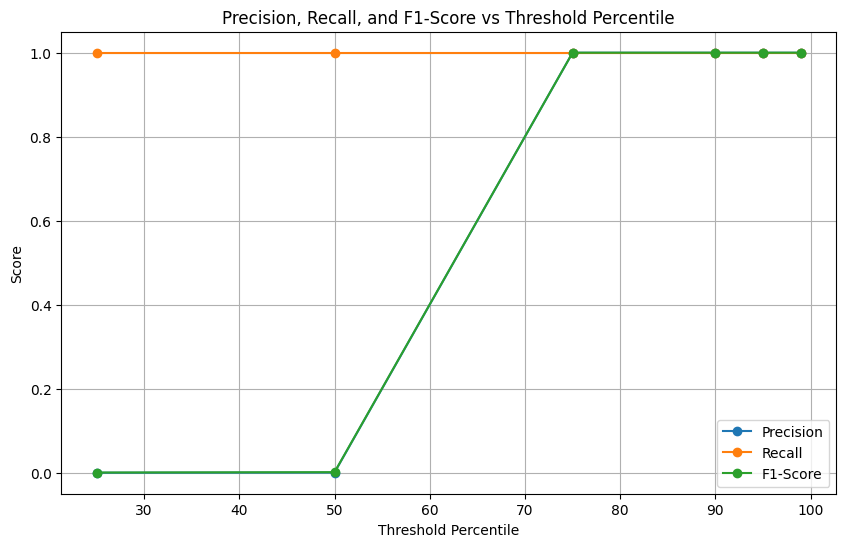

In [41]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Plot the evaluation metrics
plt.figure(figsize=(10, 6))

plt.plot(results_df["threshold_percentile"], results_df["precision"], marker='o', label='Precision')
plt.plot(results_df["threshold_percentile"], results_df["recall"], marker='o', label='Recall')
plt.plot(results_df["threshold_percentile"], results_df["f1"], marker='o', label='F1-Score')

plt.title("Precision, Recall, and F1-Score vs Threshold Percentile")
plt.xlabel("Threshold Percentile")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()



In [30]:
percentiles = [25, 50, 75, 90, 95, 99]
all_results = []
all_metrics = []

for p in percentiles:
    print(f"\n{'='*40}\nRunning DIF at {p}th percentile\n{'='*40}")
    result, metrics = ml_dif_anomaly_lib(df, threshold_percentile=p)
    all_results.append(result)
    all_metrics.append(metrics)



Running DIF at 25th percentile
base_dir set to: c:\Users\299957\Assessment\assets
 Loading model and encoder from: c:\Users\299957\Assessment\assets
Loaded c:\Users\299957\Assessment\assets\dif_model_cloud.pkl file successfully
Loaded c:\Users\299957\Assessment\assets\encoder_cloud.pkl file successfully
📊 Using columns for encoding: ['urf_designation', 'provider_urf_designation']
✅ Inference complete. Threshold = 25th percentile (0.3113)
is_anomaly
1    6741
0    3259
Name: count, dtype: int64
 Generated structured output for 6741 anomalies.

Running DIF at 50th percentile
base_dir set to: c:\Users\299957\Assessment\assets
 Loading model and encoder from: c:\Users\299957\Assessment\assets
Loaded c:\Users\299957\Assessment\assets\dif_model_cloud.pkl file successfully
Loaded c:\Users\299957\Assessment\assets\encoder_cloud.pkl file successfully
📊 Using columns for encoding: ['urf_designation', 'provider_urf_designation']
✅ Inference complete. Threshold = 50th percentile (0.3270)
is_anoma

In [32]:
metrics_df = pd.DataFrame(all_metrics)
print(metrics_df)


   threshold_percentile  threshold_value  num_anomalies  score_min  score_max  \
0                    25         0.311271           6741   0.326962   0.362059   
1                    50         0.326962           3401   0.327032   0.362059   
2                    75         0.327032              3   0.345585   0.362059   
3                    90         0.327032              3   0.345585   0.362059   
4                    95         0.327032              3   0.345585   0.362059   
5                    99         0.327032              3   0.345585   0.362059   

   score_mean  score_std  
0    0.327010   0.000634  
1    0.327057   0.000889  
2    0.356053   0.009099  
3    0.356053   0.009099  
4    0.356053   0.009099  
5    0.356053   0.009099  


In [24]:
print("Unique DIF Scores:", np.unique(dif_test_scores).shape[0])
for p in [25,50,75,90,95,99]:
    t = np.percentile(dif_test_scores, p)
    print(f"{p}th percentile threshold = {t:.5f}")
    print("Subset size:", (dif_test_scores > t).sum())


Unique DIF Scores: 2762
25th percentile threshold = 0.32347
Subset size: 2250
50th percentile threshold = 0.33015
Subset size: 1500
75th percentile threshold = 0.33623
Subset size: 750
90th percentile threshold = 0.34194
Subset size: 300
95th percentile threshold = 0.34533
Subset size: 150
99th percentile threshold = 0.35171
Subset size: 30


#### Persist Model/OHE

In [42]:
!pip show torch

Name: torch
Version: 2.4.1
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: c:\users\281379\appdata\local\packages\pythonsoftwarefoundation.python.3.10_qbz5n2kfra8p0\localcache\local-packages\python310\site-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, typing-extensions
Required-by: 


In [18]:
import os
# import joblib
import cloudpickle

model_path="assets/dif_model_cloud.pkl"
encoder_path="assets/encoder_cloud.pkl"

# Create directory if missing
os.makedirs(os.path.dirname(model_path), exist_ok=True)

# 6️⃣ Save both model and encoder
with open(model_path, "wb") as f:
    cloudpickle.dump(dif_urf, f)
with open(encoder_path, "wb") as f:
    cloudpickle.dump(encoder, f)
# cloudpickle.dump(dif_urf, model_path)
# cloudpickle.dump(encoder, encoder_path)

print(f"✅ Model saved at: {model_path}")
print(f"✅ Encoder saved at: {encoder_path}")

✅ Model saved at: assets/dif_model_cloud.pkl
✅ Encoder saved at: assets/encoder_cloud.pkl


#### Test Data

In [52]:
test_df_urf = pd.DataFrame(X_test_urf)  # assuming X_test is a DataFrame or can be converted
test_df_urf['dif_Score'] = dif_test_scores_urf

# ['provider_id','national_provider_id_provider_composite']
cols_subset_urf = ['urf_designation', 'provider_urf_designation']
test_df_urf = test_df_urf[cols_subset_urf + ['dif_Score']]
print(test_df_urf.shape)
# test_df_urf.head()

# Join test_df_urf with the original df using index alignment
merged_df_urf = df.loc[test_df_urf.index].join(test_df_urf[['dif_Score']])
merged_df_urf.head()


(3000, 3)


provider_id provider_office_city_nm provider_office_state_cd  \
6252        82158            South Marcus                       WY   
4684         7473             Garciaburgh                       NV   
1731        80232                Adamtown                       IA   
4742         5666             Simpsonside                       PR   
4521        49761      West Haroldborough                       NY   

     provider_office_street_address  provider_office_zip_cd  \
6252     1123 Mark Lights Suite 965                   96796   
4684     68596 Dawn Shores Apt. 163                   12501   
1731     92359 Mary Creek Suite 962                   37822   
4742    3220 Michael Oval Suite 240                   65684   
4521    7925 Joseph Place Suite 058                   86853   

      provider_office_zip_cd_3_digit provider_urf_designation provider_hsr  \
6252                             122                 Frontier        HSR69   
4684                             552                    Rural        HSR81   
1731                             965                    Rural        HSR40   
4742                             561                 Frontier        HSR68   
4521                             595                    Rural        HSR60   

      medicare_provider_id_provider  national_provider_id_provider  ...  \
6252                      799933223                     1003646753  ...   
4684                      667169699                     1831929595  ...   
1731                      886586604                     1104656974  ...   
4742                      755078171                     1467938381  ...   
4521                      839865183                     1427459627  ...   

       latitude   longitude state zip_cd zip_cd_3_digit  urf_designation hsr  \
6252 -43.991836 -127.647363    NJ  88849             79         Frontier  64   
4684  88.250636  150.298543    PW  88327            927            Rural  69   
1731 -32.713027  163.226476    SD  43793            772            Rural  75   
4742 -60.998743  -27.291620    VT  21279            654         Frontier  39   
4521 -73.737556 -150.429604    IA  48101            245            Rural  38   

      tax_id_type anomalies_present  dif_Score  
6252          SSN             False   0.313212  
4684          SSN             False   0.329206  
1731          SSN             False   0.329206  
4742          EIN             False   0.313212  
4521          SSN             False   0.329206  

[5 rows x 78 columns]

In [83]:
merged_df_urf.dif_Score.unique()

array([0.32566213, 0.33689258, 0.30480036, 0.34985811])

In [84]:
#  Define percentiles to evaluate
percentiles = [25, 50, 75, 90, 95, 99]

# Generate anomaly DataFrames for each percentile
dif_anomaly_dfs_urf = {}
for p in percentiles:
    threshold = np.percentile(dif_test_scores_urf, p)
    df_name = f'dif_anomaly_df_{p}'
    anomaly_df = test_df_urf[test_df_urf['dif_Score'] > threshold].copy()
    # Join test_df_urf with the original df using index alignment
    anomaly_df = df.loc[anomaly_df.index].join(anomaly_df[['dif_Score']])
    # anomaly_df['is_dif_anomaly'] = 'y'
    dif_anomaly_dfs_urf[df_name] = anomaly_df

print(dif_anomaly_dfs_urf.keys())


dict_keys(['dif_anomaly_df_25', 'dif_anomaly_df_50', 'dif_anomaly_df_75', 'dif_anomaly_df_90', 'dif_anomaly_df_95', 'dif_anomaly_df_99'])


In [85]:

target_indexes = dif_anomaly_dfs_urf['dif_anomaly_df_25'].reset_index()['index'].tolist()
# Checking the ML Pattern 3.1 and Pattern 3.2 from Run - demo_run_0822_sunith_mathew_20250822_161724
indexes_to_find = [486,9106,9715] 
# + [297,468,477,540,642,743,779,897,930,944,986,1533,1547,1583,1936,1994,2136,2367,2396,2483,2487,2652,2748,3015,3035,3180,3224,3302,3356,3511,3542,3548,3613,3678,3749,3765,3803,3823,3886,3907,4030,4134,4143,4146,4181,4265,4384,4437,4594,4728,4997,5127,5258,5301,5330,5342,5406,5504,5898,5959,6334,6370,6478,6538,6579,6706,6919,6989,7157,7221,7256,7280,7285,7296,7354,7373,7446,7477,7532,7868,7898,7942,7958,8221,8253,8265,8289,8320,8420,8512,8615,8816,8849,8850,8971,8979,9090,9267,9282,9287,9302,9356,9380,9556,9596,9672,9936]
print("Checking matching anomalous rows from ML Pattern 3.1 and 3.2")
print(f"Total rows in ML Pattern 3.1 and 3.2: {len(indexes_to_find)}")
matching_indexes = check_indexes(target_indexes, indexes_to_find)
print(f"Total overlapping anomalies: {len(matching_indexes)}")

Checking matching anomalous rows from ML Pattern 3.1 and 3.2
Total rows in ML Pattern 3.1 and 3.2: 3
Total overlapping anomalies: 0


In [86]:
def summarize_overlapping_indexes(dif_anomaly_dfs_urf, indexes_to_find):
    summary_data = []
    for percentile_split, df in dif_anomaly_dfs_urf.items():
        target_indexes = df.reset_index()['index'].tolist()
        matching_indexes = list(set(target_indexes).intersection(indexes_to_find))
        summary_data.append({
            'percentile_split': percentile_split,
            'overlapping_anomaly_count': len(matching_indexes)
        })
    return pd.DataFrame(summary_data)

summarize_overlapping_indexes(dif_anomaly_dfs_urf, indexes_to_find)

percentile_split  overlapping_anomaly_count
0  dif_anomaly_df_25                          0
1  dif_anomaly_df_50                          0
2  dif_anomaly_df_75                          0
3  dif_anomaly_df_90                          0
4  dif_anomaly_df_95                          0
5  dif_anomaly_df_99                          0

In [89]:
dif_anomaly_dfs_urf['dif_anomaly_df_25'].head(1)

provider_id provider_office_city_nm provider_office_state_cd  \
6252        82158            South Marcus                       WY   

     provider_office_street_address  provider_office_zip_cd  \
6252     1123 Mark Lights Suite 965                   96796   

      provider_office_zip_cd_3_digit provider_urf_designation provider_hsr  \
6252                             122                 Frontier        HSR69   

      medicare_provider_id_provider  national_provider_id_provider  ...  \
6252                      799933223                     1003646753  ...   

       latitude   longitude state zip_cd zip_cd_3_digit  urf_designation hsr  \
6252 -43.991836 -127.647363    NJ  88849             79         Frontier  64   

      tax_id_type anomalies_present  dif_Score  
6252          SSN             False   0.325662  

[1 rows x 78 columns]

#### Explanation(LIME)

#### Inference

In [4]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from pyod.models.dif import DIF
import cloudpickle
from typing import Tuple
import pandas as pd
import numpy as np
from pathlib import Path
from typing import List, Dict, Any



In [8]:
# !pip show numpy
# !pip show scikit-learn
# !pip show torch

In [28]:

# ---------------------------------------------
# Helper: message_for_rule
# ---------------------------------------------
def message_for_rule(rule_name: str) -> str:
    """Return descriptive text for a given rule."""
    messages = {
        'rule_3_3': "Model-detected anomaly using IsolationForest algorithm (pattern 3.3)."
    }
    return messages.get(rule_name, "Anomaly detected by ML model.")



In [12]:

# ---------------------------------------------
# Orchestrator: Load + Infer + Format Results
# ---------------------------------------------
def ml_dif_anomaly_lib(
    df: pd.DataFrame,
    threshold_percentile: float = 50
) -> List[Dict[str, Any]]:
    """
    Load pretrained DIF model and encoder from the 'data/' directory
    (located one level above the current library folder), perform inference
    on df, and return anomalies in structured JSON format.
    """
    import types

    # 1 Resolve model and encoder paths
    try:
        base_dir = Path(__file__).resolve().parent.parent / "assets"
        # base_dir = Path("/app/data")
        # base_dir = Path(os.getcwd()) / "data"  # fallback for Jupyter or REPL
    except NameError:
        base_dir = Path(os.getcwd()) / "assets"  # fallback for Jupyter or REPL

    # # Resolve model and encoder paths
    # try:
    #     base_dir = Path(__file__).resolve().parent.parent / "data"
    # except NameError:
    #     base_dir = Path(os.getcwd()) / "data"  # fallback for Jupyter or REPL
    # model_file = base_dir / "dif_model.joblib"
    # encoder_file = base_dir / "encoder.joblib"

    print(f"base_dir set to: {base_dir}")

    model_files = ["dif_model_cloud.pkl"]
    encoder_files = ["encoder_cloud.pkl"]

    # Find the first existing model file
    model_file = next((base_dir / f for f in model_files if (base_dir / f).exists()), None)
    # Find the first existing encoder file
    encoder_file = next((base_dir / f for f in encoder_files if (base_dir / f).exists()), None)

    # Check if both files were found
    if model_file is None or encoder_file is None:
        raise FileNotFoundError(
            f"❌ Model or encoder not found in {base_dir}. "
            f"Tried: {model_files} and {encoder_files}"
        )
    
    # Patch missing module reference
    torch.utils = getattr(torch, "utils", types.SimpleNamespace())
    torch.utils.serialization = getattr(torch.utils, "serialization", types.SimpleNamespace())

    print(f" Loading model and encoder from: {base_dir}")
    with open(model_file, "rb") as f:
        model = cloudpickle.load(f)
    print(f"Loaded {model_file} file successfully")
    with open(encoder_file, "rb") as f:
        encoder = cloudpickle.load(f)
    print(f"Loaded {encoder_file} file successfully")

    # 2 Detect categorical columns automatically
    # subset_cols = df.select_dtypes(include="object").columns.tolist()
    subset_cols = ['urf_designation', 'provider_urf_designation']
    if not subset_cols:
        raise ValueError("❌ No categorical columns found for encoding in test data.")

    print(f"📊 Using columns for encoding: {subset_cols}")

    # 3 Perform inference
    X_test_encoded = encoder.transform(df[subset_cols])
    dif_scores = model.decision_function(X_test_encoded.toarray())

    # 4 Apply threshold
    threshold = np.percentile(dif_scores, threshold_percentile)
    df = df.copy()
    df["dif_Score"] = dif_scores
    df["is_anomaly"] = (df["dif_Score"] > threshold).astype(int)

    print(f"✅ Inference complete. Threshold = {threshold_percentile}th percentile ({threshold:.4f})")
    print(df["is_anomaly"].value_counts())

    # 5 Filter anomalies
    anomalies = df[df["is_anomaly"] == 1].reset_index(drop=True)
    if anomalies.empty:
        print("⚠️ No anomalies detected by the model.")
        return []

    # 6 Columns to include in result (keep only existing ones)
    cols_to_include = [
        "provider_id",
        "provider_first_nm_provider",
        "provider_last_nm_provider",
        "national_provider_id_provider",
        "urf_designation",
        "provider_urf_designation",
        "dif_Score",
    ]
    existing_cols = [c for c in cols_to_include if c in anomalies.columns]

    # 7 Build structured result
    result = [
        {
            "issueCol": ["urf_designation", "provider_urf_designation"],
            "issueCode": ["pattern 3.3"],
            "issueDesc": [message_for_rule("rule_3_3")],
            "issueValues": [
                {col: anomalies[col].fillna("").tolist() for col in existing_cols}
            ],
            "rowNumbers": [anomalies.index.tolist()],
        }
    ]

    print(f" Generated structured output for {len(anomalies)} anomalies.")
    return result
  


In [13]:
pattern_3_3_result = ml_dif_anomaly_lib(df=X_test_urf, threshold_percentile=75)


base_dir set to: c:\Users\281379\OneDrive - UST\Documents\delivery\healthiq_v3\assets
 Loading model and encoder from: c:\Users\281379\OneDrive - UST\Documents\delivery\healthiq_v3\assets
Loaded c:\Users\281379\OneDrive - UST\Documents\delivery\healthiq_v3\assets\dif_model_cloud.pkl file successfully
Loaded c:\Users\281379\OneDrive - UST\Documents\delivery\healthiq_v3\assets\encoder_cloud.pkl file successfully
📊 Using columns for encoding: ['urf_designation', 'provider_urf_designation']
✅ Inference complete. Threshold = 75th percentile (0.3292)
is_anomaly
0    2999
1       1
Name: count, dtype: int64
 Generated structured output for 1 anomalies.


In [17]:
pattern_3_3_result[0]

{'issueCol': ['urf_designation', 'provider_urf_designation'],
 'issueCode': ['pattern 3.3'],
 'issueDesc': ['Model-detected anomaly using IsolationForest algorithm (pattern 3.3).'],
 'issueValues': [{'urf_designation': ['Rural'],
   'provider_urf_designation': ['Urban'],
   'dif_Score': [0.35144778161390006]}],
 'rowNumbers': [[0]]}

In [ ]:
# pattern_3_3_result[0]["issueValues"][0] #['urf_designation']
# pattern_3_3_result[0]
set(pattern_3_3_result[0]["issueValues"][0]['dif_Score'])


{0.336595760419823, 0.3517599635268431}

In [1]:
!pip show numpy

Name: numpy
Version: 2.2.6
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2024, NumPy Developers.
         All rights reserved.
         
         Redistribution and use in source and binary forms, with or without
         modification, are permitted provided that the following conditions are
         met:
         
             * Redistributions of source code must retain the above copyright
                notice, this list of conditions and the following disclaimer.
         
             * Redistributions in binary form must reproduce the above
                copyright notice, this list of conditions and the following
                disclaimer in the documentation and/or other materials provided
                with the distribution.
         
             * Neither the name of the NumPy Developers nor the names of any
                contributors may be used to e

### Augmented Data

In [ ]:
import pandas as pd
import itertools
import numpy as np

def generate_logical_interactions(X, numeric_pairs=True, categorical_pairs=True, cat_num_pairs=True):
    """
    Create interactions
        Numeric × numeric → use products or ratios (e.g. claim_amount × num_visits)
        Categorical × categorical → use encoded cross features (e.g. payer + zip)
        Categorical × numeric → use group-normalized or mean deviation features (e.g. how much is this provider’s cost above the mean for their payer)

    """
    import pandas as pd
    import itertools
    import numpy as np
    
    num_cols = X.select_dtypes(include=[np.number]).columns
    cat_cols = X.select_dtypes(exclude=[np.number]).columns

    interactions = pd.DataFrame(index=X.index)

    # 1. Numeric × Numeric — logical interactions
    if numeric_pairs:
        for col1, col2 in itertools.combinations(num_cols, 2):
            interactions[f'{col1}_ratio_{col2}'] = np.where(X[col2] != 0, X[col1] / X[col2], 0)
            interactions[f'{col1}_diff_{col2}'] = X[col1] - X[col2]

    # 2. Categorical × Categorical — encoded cross feature
    if categorical_pairs:
        for col1, col2 in itertools.combinations(cat_cols, 2):
            interactions[f'{col1}_x_{col2}'] = X[col1].astype(str) + "_" + X[col2].astype(str)

    # 3. Categorical × Numeric — deviation from group mean
    if cat_num_pairs:
        for cat_col in cat_cols:
            for num_col in num_cols:
                group_mean = X.groupby(cat_col)[num_col].transform('mean')
                interactions[f'{num_col}_above_{cat_col}_mean'] = X[num_col] - group_mean

    return pd.concat([X, interactions], axis=1)


In [ ]:
X_train_aug = generate_logical_interactions(X_train)

print("Original features:", X_train.shape[1])
print("Augmented features:", X_train_aug.shape[1])
X_train_aug.head(1)


In [ ]:
X_train_aug

## AnoGan

In [170]:
# --- AnoGAN Model ---
anogan = AnoGAN()
anogan.fit(X_trn_urf_encoded)
anogan_train_scores = anogan.decision_scores_
anogan_test_scores = anogan.decision_function(X_tst_urf_encoded)

# Print summaries
print("AnoGan Train Scores Summary:")
print(pd.Series(anogan_train_scores).describe())

print("\AnoGan Test Scores Summary:")
print(pd.Series(anogan_test_scores).describe())


KeyboardInterrupt: 

## So-GaaL (Single-Objective GAN) Model
- GAN-style anomaly detector that doesn’t require purely normal data.
- The generator tries to produce potential anomalies to challenge the discriminator.
- Fully unsupervised and robust.

In [8]:
from pyod.models.so_gaal import SO_GAAL

sogan = SO_GAAL(stop_epochs=15)
sogan.fit(X_trn_urf_encoded)
sogan_train_scores = sogan.decision_scores_
sogan_test_scores = sogan.decision_function(X_tst_urf_encoded)

# Print summaries
print("SoGan Train Scores Summary:")
print(pd.Series(sogan_train_scores).describe())

print("\SoGan Test Scores Summary:")
print(pd.Series(sogan_test_scores).describe())


Epoch 1 of 45
Epoch 2 of 45
Epoch 3 of 45
Epoch 4 of 45
Epoch 5 of 45
Epoch 6 of 45
Epoch 7 of 45
Epoch 8 of 45
Epoch 9 of 45
Epoch 10 of 45
Epoch 11 of 45
Epoch 12 of 45
Epoch 13 of 45
Epoch 14 of 45
Epoch 15 of 45
Epoch 16 of 45
Epoch 17 of 45
Epoch 18 of 45
Epoch 19 of 45
Epoch 20 of 45
Epoch 21 of 45
Epoch 22 of 45
Epoch 23 of 45
Epoch 24 of 45
Epoch 25 of 45
Epoch 26 of 45
Epoch 27 of 45
Epoch 28 of 45
Epoch 29 of 45
Epoch 30 of 45
Epoch 31 of 45
Epoch 32 of 45
Epoch 33 of 45
Epoch 34 of 45
Epoch 35 of 45
Epoch 36 of 45
Epoch 37 of 45
Epoch 38 of 45
Epoch 39 of 45
Epoch 40 of 45
Epoch 41 of 45
Epoch 42 of 45
Epoch 43 of 45
Epoch 44 of 45
Epoch 45 of 45
SoGan Train Scores Summary:
count    7000.000000
mean        0.983138
std         0.024127
min         0.019734
25%         0.955823
50%         0.996364
75%         0.998240
max         0.998240
dtype: float64
\SoGan Test Scores Summary:
count    3000.000000
mean        0.983252
std         0.026048
min         0.037983
25%        

In [9]:
print("SoGan Train Scores Summary:")
print(pd.Series(sogan_train_scores).describe())

print("\SoGan Test Scores Summary:")
print(pd.Series(sogan_test_scores).describe())


SoGan Train Scores Summary:
count    7000.000000
mean        0.983138
std         0.024127
min         0.019734
25%         0.955823
50%         0.996364
75%         0.998240
max         0.998240
dtype: float64
\SoGan Test Scores Summary:
count    3000.000000
mean        0.983252
std         0.026048
min         0.037983
25%         0.955823
50%         0.996364
75%         0.998240
max         0.998240
dtype: float64


In [10]:
test_df_urf_sogan = pd.DataFrame(X_test_urf)  # assuming X_test is a DataFrame or can be converted
# X_trn_urf_encoded
test_df_urf_sogan['sogan_Score'] = sogan_test_scores

# ['provider_id','national_provider_id_provider_composite']
cols_subset_urf = ['urf_designation', 'provider_urf_designation']
test_df_urf_sogan = test_df_urf_sogan[cols_subset_urf + ['sogan_Score']]
print(test_df_urf_sogan.shape)

# Join test_df_urf with the original df using index alignment
merged_df_urf_sogan = df.loc[test_df_urf_sogan.index].join(test_df_urf_sogan[['sogan_Score']])
merged_df_urf_sogan.head(2)


(3000, 3)


provider_id provider_office_city_nm provider_office_state_cd  \
6252        82158            South Marcus                       WY   
4684         7473             Garciaburgh                       NV   

     provider_office_street_address  provider_office_zip_cd  \
6252     1123 Mark Lights Suite 965                   96796   
4684     68596 Dawn Shores Apt. 163                   12501   

      provider_office_zip_cd_3_digit provider_urf_designation provider_hsr  \
6252                             122                 Frontier        HSR69   
4684                             552                    Rural        HSR81   

      medicare_provider_id_provider  national_provider_id_provider  ...  \
6252                      799933223                     1003646753  ...   
4684                      667169699                     1831929595  ...   

       latitude   longitude state zip_cd zip_cd_3_digit  urf_designation hsr  \
6252 -43.991836 -127.647363    NJ  88849             79         Frontier  64   
4684  88.250636  150.298543    PW  88327            927            Rural  69   

      tax_id_type anomalies_present  sogan_Score  
6252          SSN             False     0.996364  
4684          SSN             False     0.955823  

[2 rows x 78 columns]

#### So-Gaal Percentile

In [11]:
#  Define percentiles to evaluate
percentiles = [25, 50, 75, 90, 95, 99]

# Generate anomaly DataFrames for each percentile
sogan_anomaly_dfs_urf = {}
for p in percentiles:
    threshold = np.percentile(sogan_test_scores, p)
    df_name = f'sogan_anomaly_df_{p}'
    anomaly_df = test_df_urf_sogan[test_df_urf_sogan['sogan_Score'] > threshold].copy()
    # Join test_df_urf with the original df using index alignment
    anomaly_df = df.loc[anomaly_df.index].join(anomaly_df[['sogan_Score']])
    sogan_anomaly_dfs_urf[df_name] = anomaly_df

print(sogan_anomaly_dfs_urf.keys())


dict_keys(['sogan_anomaly_df_25', 'sogan_anomaly_df_50', 'sogan_anomaly_df_75', 'sogan_anomaly_df_90', 'sogan_anomaly_df_95', 'sogan_anomaly_df_99'])


In [12]:

target_indexes = sogan_anomaly_dfs_urf['sogan_anomaly_df_75'].reset_index()['index'].tolist()
# Checking the ML Pattern 3.1 and Pattern 3.2 from Run - demo_run_0822_sunith_mathew_20250822_161724
indexes_ml_pattern_1 = [486,9106,9715]
indexes_ml_pattern_2 = [297,468,477,540,642,743,779,897,930,944,986,1533,1547,1583,1936,1994,2136,2367,2396,2483,2487,2652,2748,3015,3035,3180,3224,3302,3356,3511,3542,3548,3613,3678,3749,3765,3803,3823,3886,3907,4030,4134,4143,4146,4181,4265,4384,4437,4594,4728,4997,5127,5258,5301,5330,5342,5406,5504,5898,5959,6334,6370,6478,6538,6579,6706,6919,6989,7157,7221,7256,7280,7285,7296,7354,7373,7446,7477,7532,7868,7898,7942,7958,8221,8253,8265,8289,8320,8420,8512,8615,8816,8849,8850,8971,8979,9090,9267,9282,9287,9302,9356,9380,9556,9596,9672,9936] 
indexes_to_find = indexes_ml_pattern_1 
print("Checking matching anomalous rows from ML Pattern 3.1 and 3.2")
print(f"Total rows in ML Pattern 3.1 and 3.2: {len(indexes_to_find)}")
matching_indexes = check_indexes(target_indexes, indexes_to_find)
print(f"Total overlapping anomalies: {len(matching_indexes)}")


Checking matching anomalous rows from ML Pattern 3.1 and 3.2
Total rows in ML Pattern 3.1 and 3.2: 3
Total overlapping anomalies: 0


In [13]:
def summarize_overlapping_indexes(anomaly_dfs, indexes_to_find):
    summary_data = []
    for percentile_split, df in anomaly_dfs.items():
        target_indexes = df.reset_index()['index'].tolist()
        matching_indexes = list(set(target_indexes).intersection(indexes_to_find))
        summary_data.append({
            'percentile_split': percentile_split,
            'overlapping_anomaly_count': len(matching_indexes)
        })
    return pd.DataFrame(summary_data)

summarize_overlapping_indexes(sogan_anomaly_dfs_urf, indexes_to_find)

percentile_split  overlapping_anomaly_count
0  sogan_anomaly_df_25                          2
1  sogan_anomaly_df_50                          2
2  sogan_anomaly_df_75                          0
3  sogan_anomaly_df_90                          0
4  sogan_anomaly_df_95                          0
5  sogan_anomaly_df_99                          0

#### Explanation

In [ ]:
from lime.lime_tabular import LimeTabularExplainer

sogan_trn_df = pd.DataFrame(X_trn_urf_encoded, columns=encoder.get_feature_names_out())
sogna_tst_df = pd.DataFrame(X_tst_urf_encoded, columns=encoder.get_feature_names_out())
explainer = LimeTabularExplainer(
    training_data=sogan_trn_df.values,
    feature_names=sogan_trn_df.columns,
    mode='regression'
)

i = 486
exp = explainer.explain_instance(
    data_row=sogna_tst_df.iloc[i].values,
    predict_fn=sogan.decision_function
)

exp.show_in_notebook(show_table=True)


# LIME’s explanation matches the 486 instance explanation from one-class SVM
# The bars labeled “provider_urf_designation_Rural” and “urf_designation_Rural” both have positive contributions.
# Bars labeled “provider_urf_designation_Urban” and “urf_designation_Urban” have negative contributions.

# it shows “Rural” features (both in provider and URF designation) as positive anomaly drivers
# while “Urban” features act as stabilizers.

# The conflict between Rural vs Urban triggered the anomaly detection.


In [ ]:
# component creation - Xpresso - DIF - (Pattern 3.3 - Clustering)
# Check SHAP integration with DIF
